# Using UnitMatch

We have implemented UnitMatch [1,2] so we can match units recorded across sessions. In this tutorial notebook we show how this is integrated with cluster objects for fast plotting and data analyses.

[1] https://www.nature.com/articles/s41592-024-02440-1

[2] https://github.com/EnnyvanBeest/UnitMatch/tree/main/UnitMatchPy


## Data introduction

We will be using data from medial Entorhinal Cortex from mice perfoming goal-directed navigation on the big maze.
- For this dataset, each day the mouse was recorded during `rest`, during `open_field` foraging and during `maze` navigation.
- On some days, the recordings were `object_open_field`, `maze`, and `object_open_field`.
- The recordings were carried out on four maze configurations: `fully_connected`, `maze_1`, `maze_2`, `rooms_maze` for 8-14 days each.
- additionally, on some days only a subset of the goals on the maze were rewarded, so the goal subsets are either `all`, `subset_1`, or `subset_2`.

We might therefore be interested in matching a unit across sessions within a day, or across days within a maze configuration, or even across maze configurations.
Let's try that here.

In [ ]:
# Setup

## Get access to the GridMaze modules ##
import sys
PROJECT_CODE_PATH = "/ceph/behrens/peter_doohan/goalNav_mEC/experiment/code"
sys.path.append(PROJECT_CODE_PATH)

## Import local packages ##
from GridMaze.analysis.core import unit_matching as um
from GridMaze.analysis.core import get_clusters as gc

## get_matched_clusters()

The first function we'll try out is `get_matched_clusters()`. This function takes in a list of `session_dict` dictionaries which are used to specify the sessions that will be given as inputs to UnitMatch. UnitMatch will then compute its similarity scores and we eventually return an output which is a list of lists, where each list contains cluster_unique_ID's for units which are matched together.



In [9]:
# Matching within day across open_field and maze sessions

sessions_dict = example_dict = {
    "session_types": ["open_field", "maze"], #we include sessions from both open_field and maze_recordings
    "maze_names": ["fully_connected"],
    "days_on_maze": [1],
    "goal_subsets": "all", #if not given in a list, this will be equivalent to ["all","subset_1","subset_2"]
}

matched_clusters = um.get_matched_clusters(subject_ID='mEC_5',
                        list_of_dicts = [sessions_dict])


Running unitmatch
Using cluster_group.tsv
Using cluster_group.tsv
Calculating the probability distributions of the metric scores
Calculating the match probabilities
The percentage of units matched to themselves is: 84.50704225352112%
The percentage of false -ve's then is: 15.49295774647888% 

The rate of miss-match(es) per expected match 0.04225352112676056
The percentage of false +ve's is 0.0641025641025641% for session 1
The percentage of false +ve's is 0.21505376344086022% for session 2

This assumes that the spike sorter has made no mistakes
Number of Liberal Matches: 19
Number of Intermediate Matches: 17
Number of Conservative Matches: 17


/ceph/behrens/peter_doohan/goalNav_mEC/experiment/code/GridMaze/analysis/cluster_tuning/spatial.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  color="gainsboro",


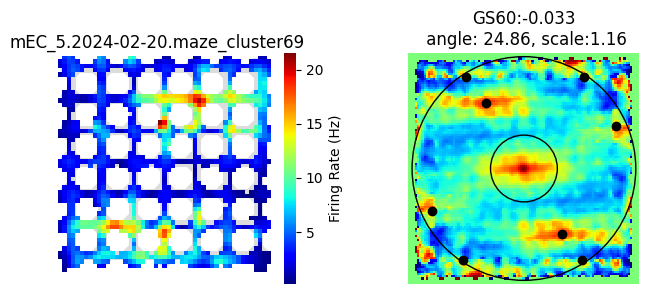

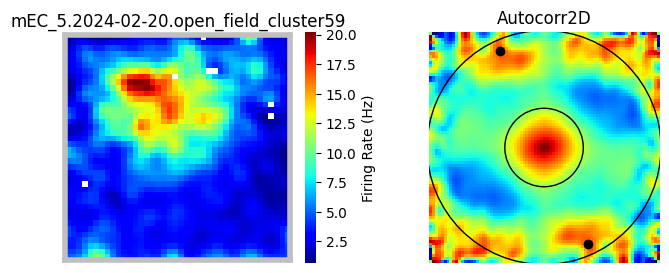

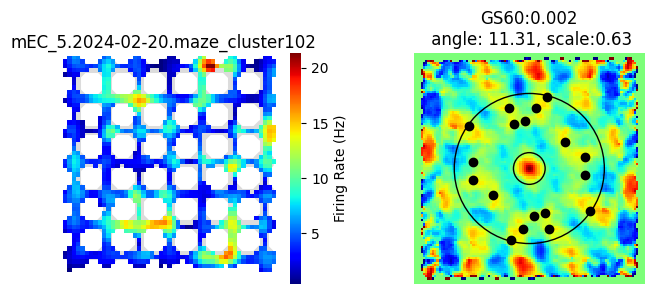

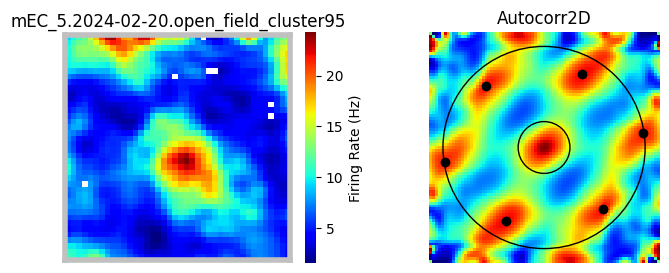

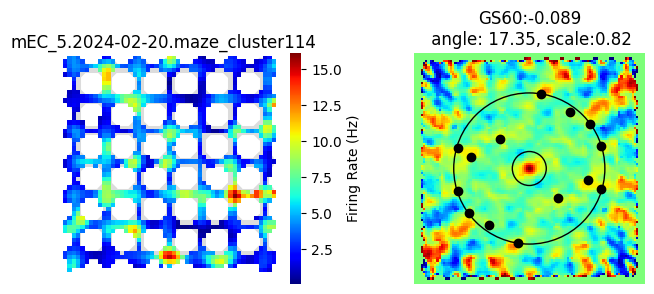

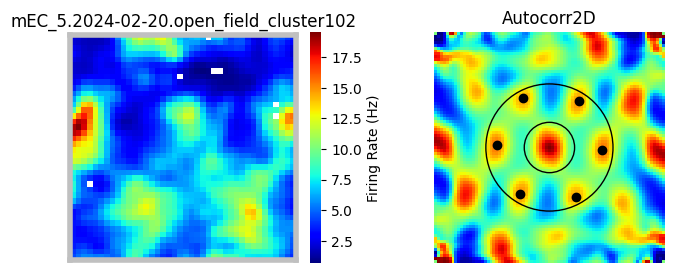

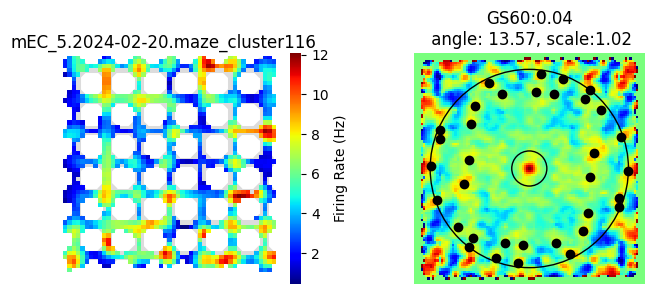

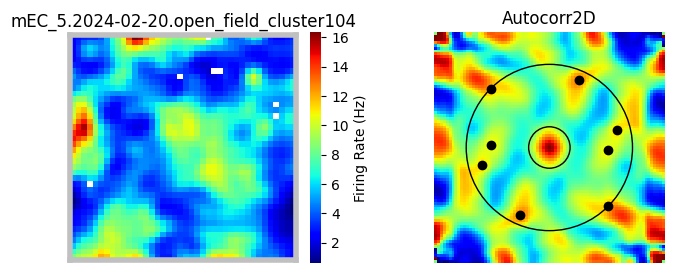

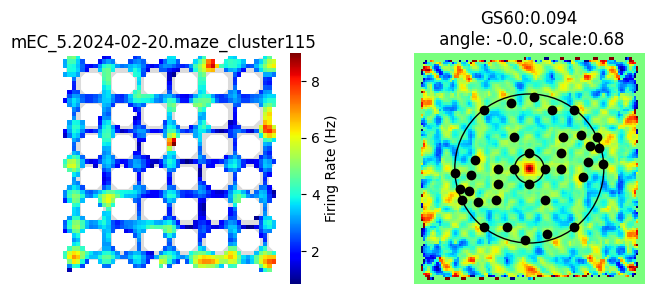

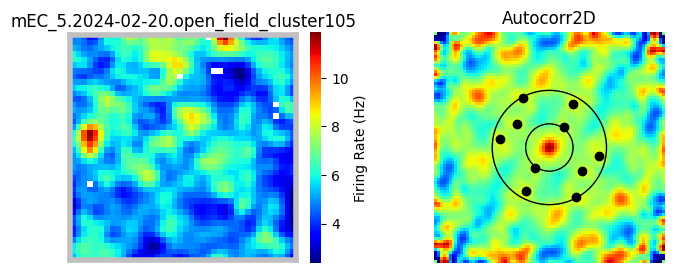

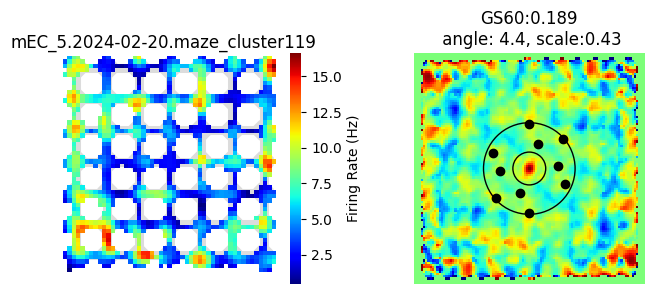

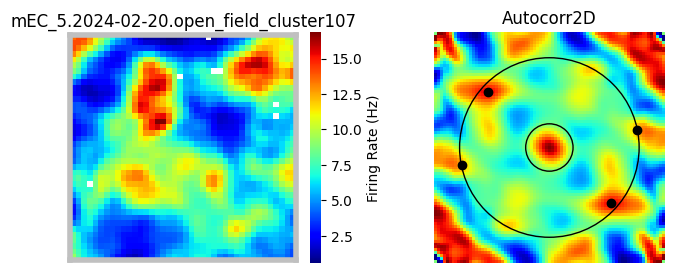

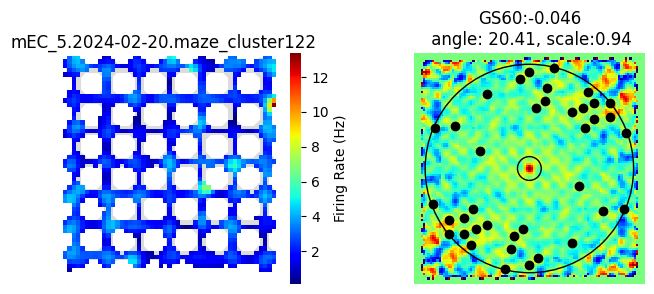

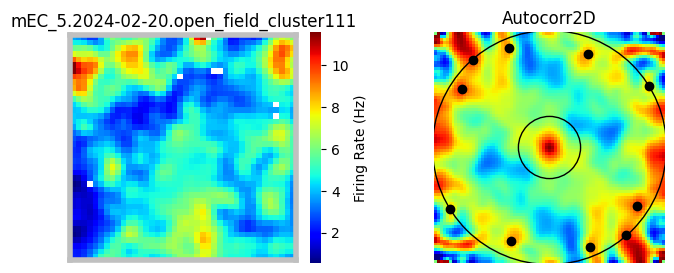

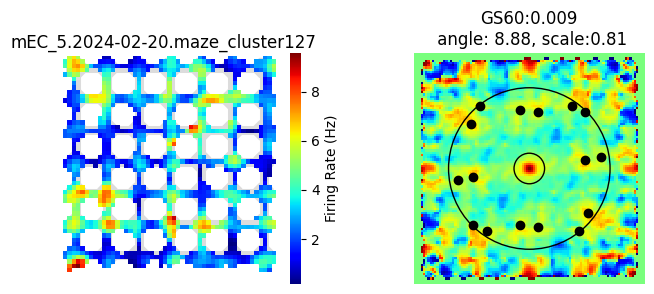

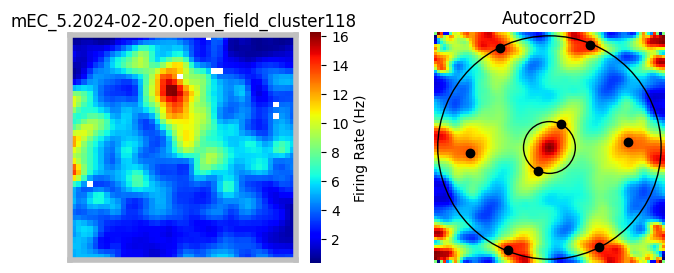

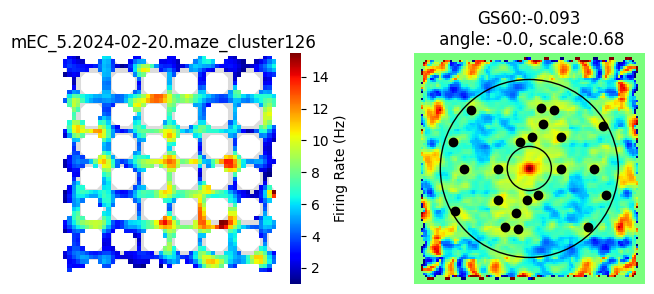

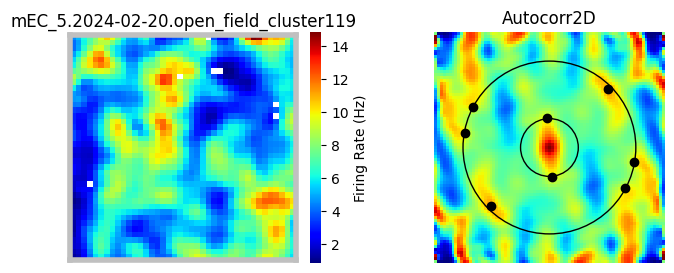

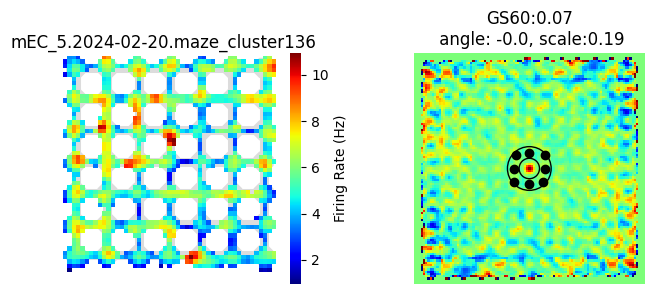

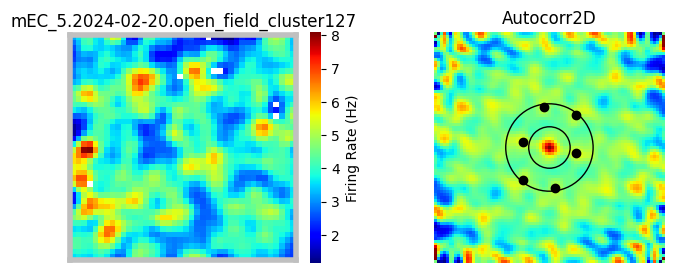

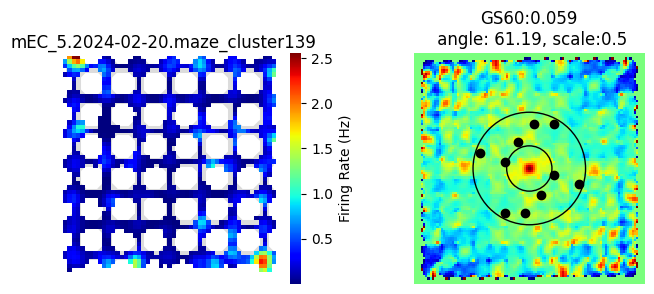

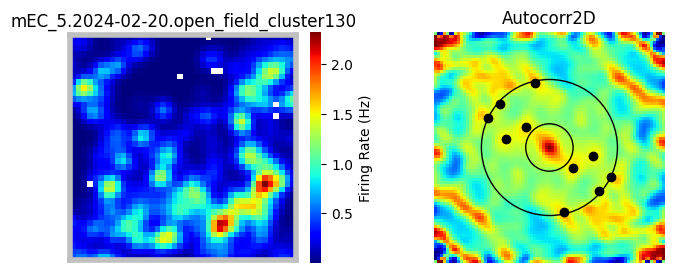

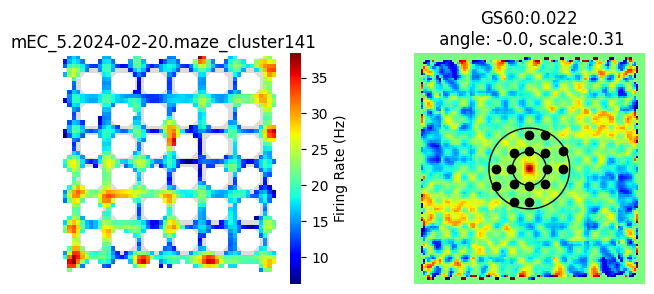

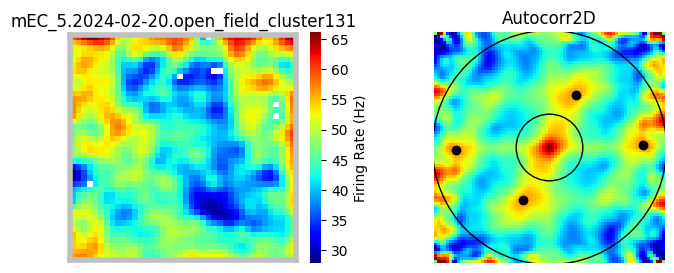

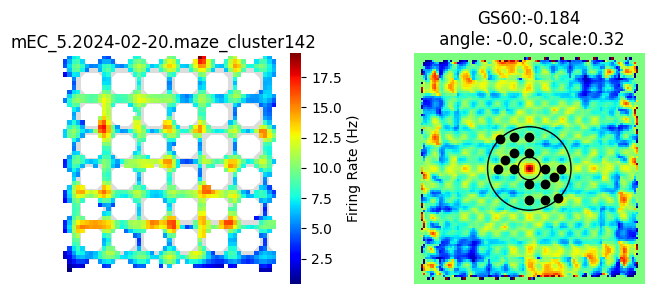

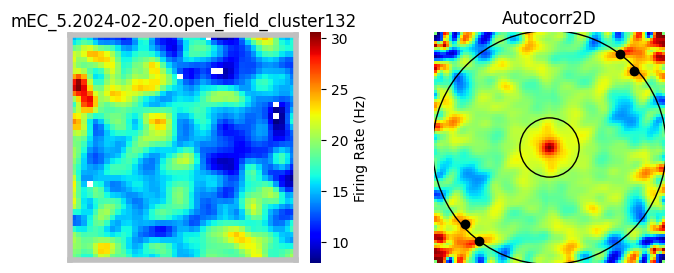

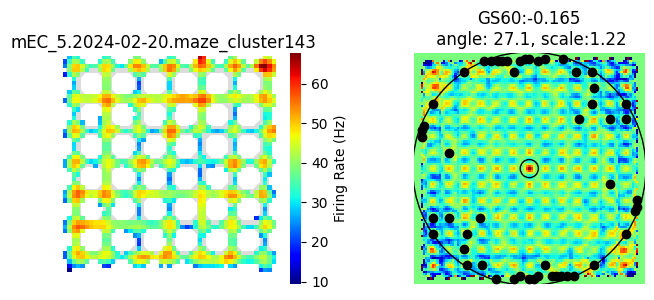

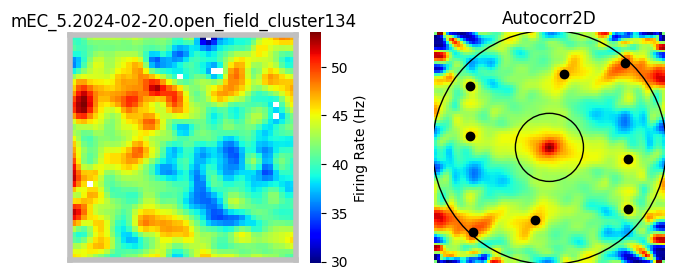

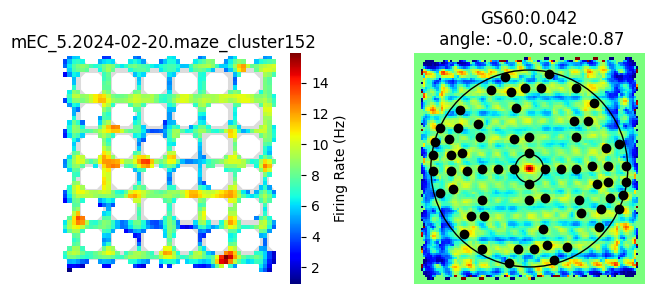

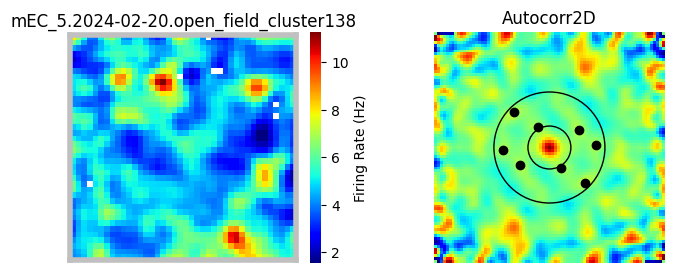

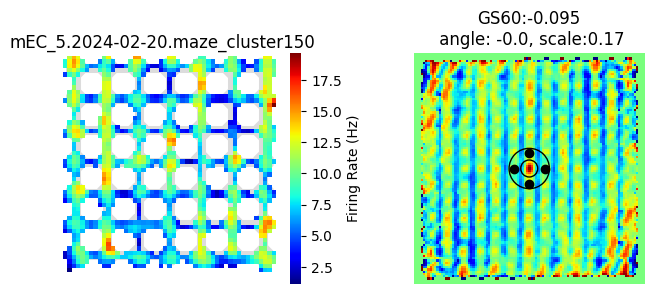

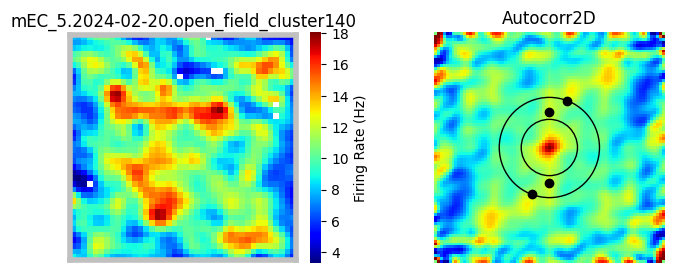

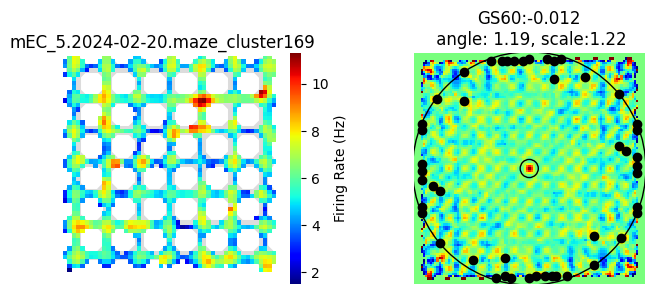

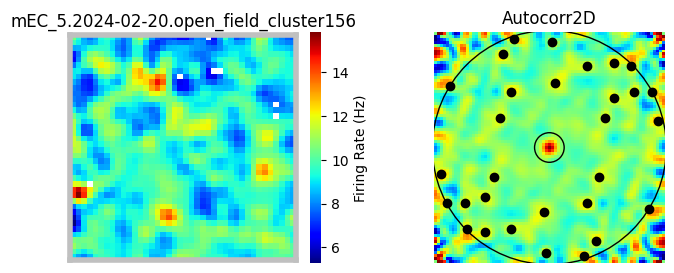

In [18]:
for each_match in matched_clusters:
    for each_cluster in each_match:
        each_cluster.plot_tuning('spatial')